### A notebook testing the difference in execution time of the MNIST classification using a simple CNN on the CPU vson the dedicated GPU (NVIDIA GeForce RTX 4050)

In [1]:
import os
import time
import torch
import engine, model_builder
from utils import plot_predictions, save_model

import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from torchvision import transforms

c:\Users\Julia\OneDrive\Dokumenty\NAUKA\MyCode\exp\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Set up hyperparameters

In [2]:
cuda = "cuda"
cpu  = "cpu"
num_classes = 10 #MNIST dataset containing handwritten digits from 1-9

#TODO: learn automatic hyperparameter tuning
LR = 0.001 
NUM_EPOCHS = 10
BATCH_SIZE = 64

# note: you can't change a constant value - just access it  

Download the dataset

In [3]:
#TODO: Play with other datasets
#TODO: Play with transforms and augmentations

basic_transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root="dataset/", download=True, train=True,
                               transform=basic_transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)

test_dataset = datasets.MNIST(root="dataset/", download=True, train=False,
                               transform=basic_transform)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True)

Instantiate the model and create the GPU instance

In [4]:
#TODO: create more models/architectures and play with them

model = model_builder.CNN(in_channels=1, num_classes=num_classes)
model_gpu = model.to(cuda)

#TODO: test different loss functions + refresh theory
loss_fn = torch.nn.CrossEntropyLoss()

#TODO: test other optimizers + reftesh theory
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

Train on GPU and time the execution

In [5]:
start = time.time()
GPU_run = engine.train(model=model_gpu,
             train_dataloader=train_loader,
             test_dataloader=test_loader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             epochs=NUM_EPOCHS,
             device=cuda)
end = time.time()
print(f"Total training time on GPU: {end-start} seconds.")

 10%|█         | 1/10 [00:14<02:14, 14.91s/it]

Epoch: 1 | train_loss: 0.4003 | train_acc: 0.8862 | test_loss: 0.1369 | test_acc: 0.9609 | 


 20%|██        | 2/10 [00:29<01:55, 14.48s/it]

Epoch: 2 | train_loss: 0.1230 | train_acc: 0.9642 | test_loss: 0.0885 | test_acc: 0.9734 | 


 30%|███       | 3/10 [00:41<01:36, 13.72s/it]

Epoch: 3 | train_loss: 0.0920 | train_acc: 0.9725 | test_loss: 0.0688 | test_acc: 0.9776 | 


 40%|████      | 4/10 [00:54<01:20, 13.40s/it]

Epoch: 4 | train_loss: 0.0784 | train_acc: 0.9761 | test_loss: 0.0684 | test_acc: 0.9781 | 


 50%|█████     | 5/10 [01:08<01:08, 13.63s/it]

Epoch: 5 | train_loss: 0.0702 | train_acc: 0.9788 | test_loss: 0.0587 | test_acc: 0.9823 | 


 60%|██████    | 6/10 [01:21<00:53, 13.37s/it]

Epoch: 6 | train_loss: 0.0625 | train_acc: 0.9810 | test_loss: 0.0596 | test_acc: 0.9804 | 


 70%|███████   | 7/10 [01:33<00:38, 12.92s/it]

Epoch: 7 | train_loss: 0.0577 | train_acc: 0.9826 | test_loss: 0.0497 | test_acc: 0.9835 | 


 80%|████████  | 8/10 [01:46<00:25, 12.90s/it]

Epoch: 8 | train_loss: 0.0539 | train_acc: 0.9835 | test_loss: 0.0487 | test_acc: 0.9844 | 


 90%|█████████ | 9/10 [02:01<00:13, 13.43s/it]

Epoch: 9 | train_loss: 0.0499 | train_acc: 0.9849 | test_loss: 0.0490 | test_acc: 0.9840 | 


100%|██████████| 10/10 [02:22<00:00, 14.21s/it]

Epoch: 10 | train_loss: 0.0475 | train_acc: 0.9856 | test_loss: 0.0438 | test_acc: 0.9851 | 
Total training time on GPU: 142.09226989746094 seconds.


In [7]:
save_model(model=model_gpu,
           target_dir="./models",
           model_name="GPU_run_210925.pth")

[INFO] Saving model to: models\GPU_run_210925.pth


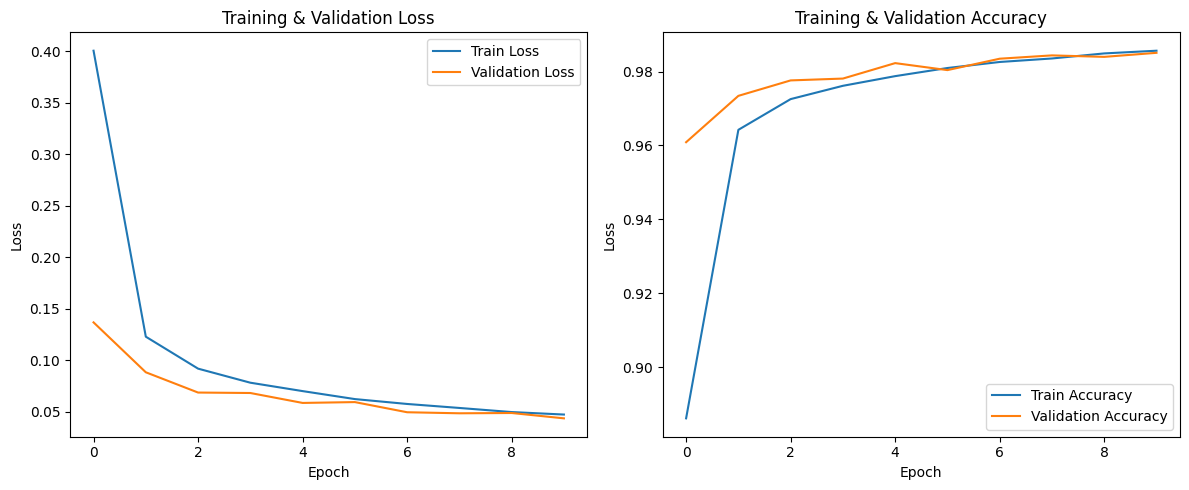

In [8]:
GPU_train_loss = GPU_run["train_loss"]
GPU_train_acc = GPU_run["train_acc"]
GPU_test_loss = GPU_run["test_loss"]
GPU_test_acc = GPU_run["test_acc"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loss subplot
axes[0].plot(GPU_train_loss, label="Train Loss")
axes[0].plot(GPU_test_loss, label="Validation Loss")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].set_title("Training & Validation Loss")
axes[0].legend()

# Accuracy subplot
axes[1].plot(GPU_train_acc, label="Train Accuracy")
axes[1].plot(GPU_test_acc, label="Validation Accuracy")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].set_title("Training & Validation Accuracy")
axes[1].legend()

plt.tight_layout()
plt.show()

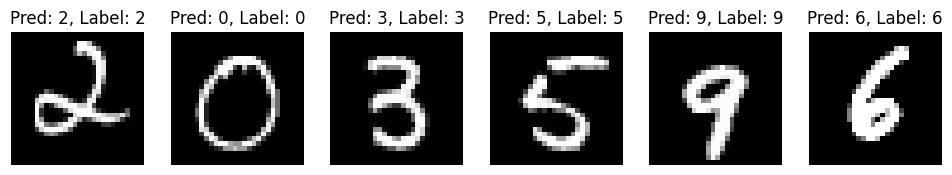

In [ ]:
plot_predictions(model=model_gpu,
                data_loader=test_loader,
                device=cuda)

Same but with CPU

In [10]:
model_cpu = model.to(cpu)
optimizer_cpu = torch.optim.Adam(model_cpu.parameters(), lr=LR)

In [13]:
start = time.time()
CPU_run = engine.train(model=model_cpu,
             train_dataloader=train_loader,
             test_dataloader=test_loader,
             loss_fn=loss_fn,
             optimizer=optimizer_cpu,
             epochs=NUM_EPOCHS,
             device="cpu")
end = time.time()
print(f"Total training time on CPU: {end-start} seconds.")

 10%|█         | 1/10 [00:27<04:04, 27.16s/it]

Epoch: 1 | train_loss: 0.0447 | train_acc: 0.9857 | test_loss: 0.0483 | test_acc: 0.9843 | 


 20%|██        | 2/10 [00:55<03:44, 28.04s/it]

Epoch: 2 | train_loss: 0.0419 | train_acc: 0.9872 | test_loss: 0.0408 | test_acc: 0.9870 | 


 30%|███       | 3/10 [01:22<03:13, 27.64s/it]

Epoch: 3 | train_loss: 0.0402 | train_acc: 0.9877 | test_loss: 0.0394 | test_acc: 0.9871 | 


 40%|████      | 4/10 [01:54<02:54, 29.03s/it]

Epoch: 4 | train_loss: 0.0377 | train_acc: 0.9883 | test_loss: 0.0393 | test_acc: 0.9862 | 


 50%|█████     | 5/10 [02:22<02:23, 28.75s/it]

Epoch: 5 | train_loss: 0.0363 | train_acc: 0.9888 | test_loss: 0.0402 | test_acc: 0.9871 | 


 60%|██████    | 6/10 [02:53<01:58, 29.70s/it]

Epoch: 6 | train_loss: 0.0341 | train_acc: 0.9891 | test_loss: 0.0438 | test_acc: 0.9855 | 


 70%|███████   | 7/10 [03:25<01:30, 30.19s/it]

Epoch: 7 | train_loss: 0.0338 | train_acc: 0.9894 | test_loss: 0.0336 | test_acc: 0.9885 | 


 80%|████████  | 8/10 [03:52<00:58, 29.32s/it]

Epoch: 8 | train_loss: 0.0322 | train_acc: 0.9895 | test_loss: 0.0450 | test_acc: 0.9864 | 


 90%|█████████ | 9/10 [04:20<00:28, 28.91s/it]

Epoch: 9 | train_loss: 0.0304 | train_acc: 0.9904 | test_loss: 0.0415 | test_acc: 0.9870 | 


100%|██████████| 10/10 [04:52<00:00, 29.25s/it]

Epoch: 10 | train_loss: 0.0302 | train_acc: 0.9902 | test_loss: 0.0369 | test_acc: 0.9878 | 
Total training time on CPU: 292.4793486595154 seconds.


In [14]:
save_model(model=model_cpu,
           target_dir="./models",
           model_name="CPU_run_210925.pth")

[INFO] Saving model to: models\CPU_run_210925.pth


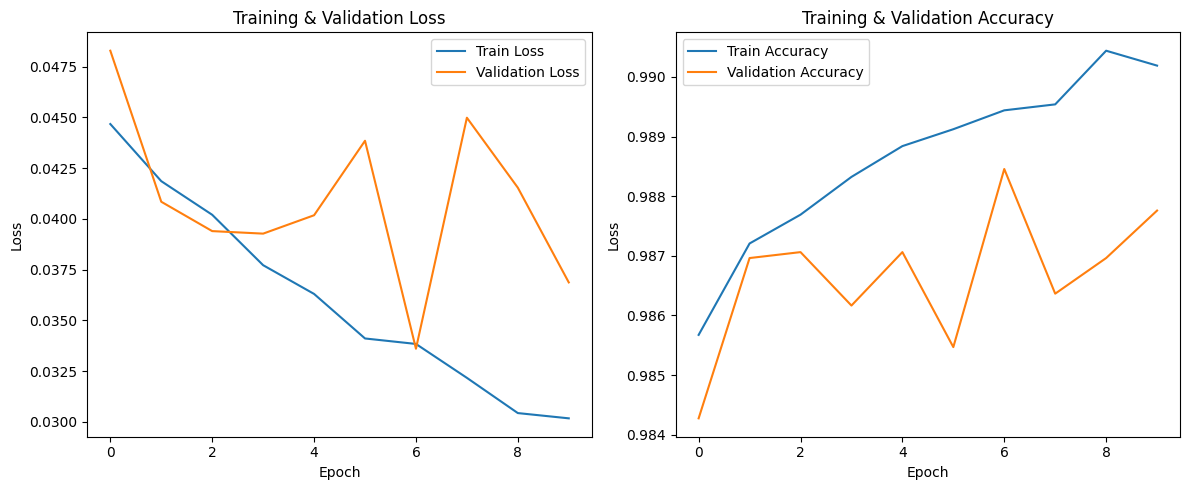

In [15]:
CPU_train_loss = CPU_run["train_loss"]
CPU_train_acc = CPU_run["train_acc"]
CPU_test_loss = CPU_run["test_loss"]
CPU_test_acc = CPU_run["test_acc"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loss subplot
axes[0].plot(CPU_train_loss, label="Train Loss")
axes[0].plot(CPU_test_loss, label="Validation Loss")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].set_title("Training & Validation Loss")
axes[0].legend()

# Accuracy subplot
axes[1].plot(CPU_train_acc, label="Train Accuracy")
axes[1].plot(CPU_test_acc, label="Validation Accuracy")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].set_title("Training & Validation Accuracy")
axes[1].legend()

plt.tight_layout()
plt.show()

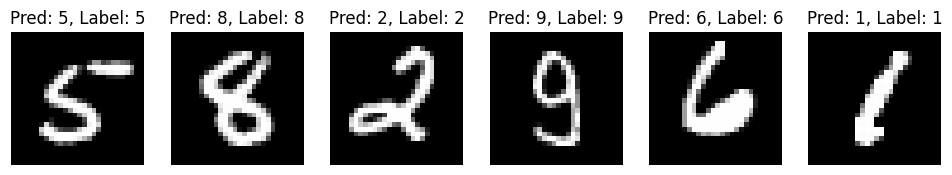

In [16]:
plot_predictions(model=model_cpu,
                data_loader=test_loader,
                device=cpu)